In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go

In [2]:
songs = pd.read_csv('df_audio_features_10.csv')

In [3]:
df = songs.set_index('song_name')
df = (
    df[['danceability', 'energy', 'key', 'loudness','speechiness', 
    'acousticness', 'instrumentalness', 'liveness','valence', 'tempo']]
)

In [4]:
df

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
song_name,,,,,,,,,,
My Band,0.851,0.84900,1,-3.383,0.0828,0.49700,0.000002,0.1160,0.8440,120.014
The Real Slim Shady,0.949,0.66100,5,-4.244,0.0572,0.03020,0.000000,0.0454,0.7600,104.504
Águas De Março,0.642,0.33900,3,-15.503,0.1400,0.85400,0.000000,0.1050,0.4910,143.418
The Girl From Ipanema,0.641,0.14000,8,-16.790,0.0390,0.86700,0.001660,0.1050,0.3880,129.318
"Paint It, Black",0.464,0.79500,1,-9.267,0.0926,0.04930,0.002440,0.3990,0.6120,158.691
Sultans Of Swing,0.733,0.79400,5,-10.023,0.0307,0.06140,0.036700,0.3300,0.9310,148.174
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,4,-10.865,0.1080,0.00314,0.867000,0.1110,0.0598,131.997
In Silence,0.736,0.84500,1,-12.017,0.0377,0.00548,0.901000,0.1110,0.1980,128.009
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,3,-33.503,0.0519,0.98900,0.596000,0.1040,0.2110,61.541


# Heatmaps

## MinMax scaler

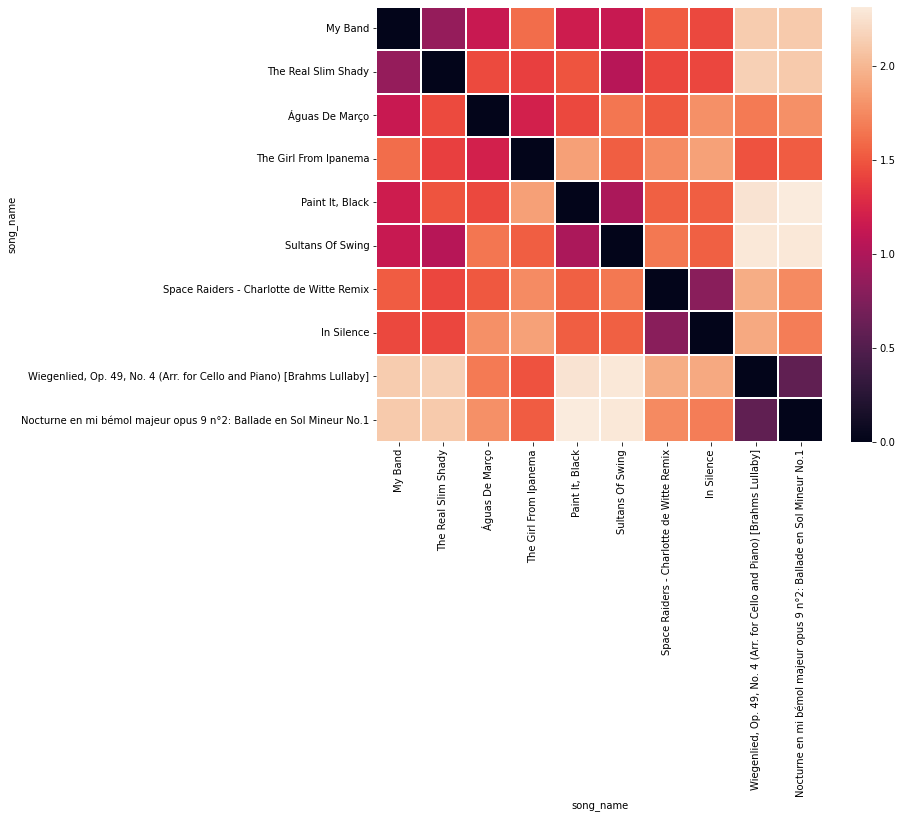

In [5]:
min_max_df = MinMaxScaler().fit_transform(df)
minmax = pd.DataFrame(min_max_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
minmax_distances = pd.DataFrame(pairwise_distances(minmax), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(minmax_distances, ax=ax1, linewidths=.2);

## Standard scaler

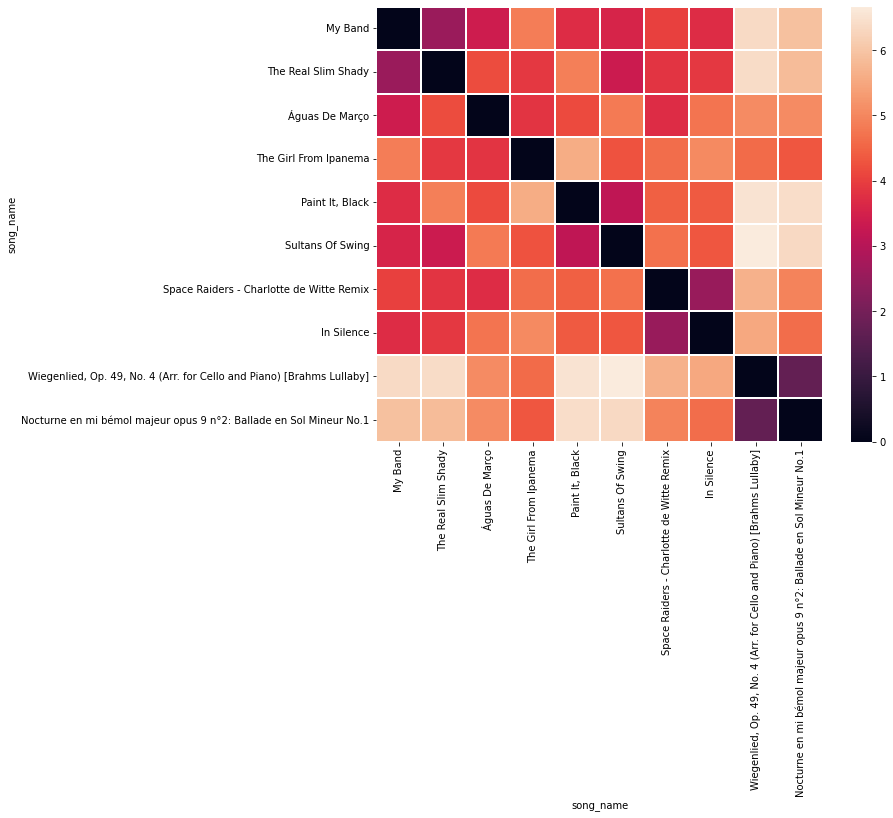

In [6]:
Standard_df = StandardScaler().fit_transform(df)
standard = pd.DataFrame(Standard_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
standard_distances = pd.DataFrame(pairwise_distances(standard), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(standard_distances, ax=ax1, linewidths=.2);

## Robust scaler

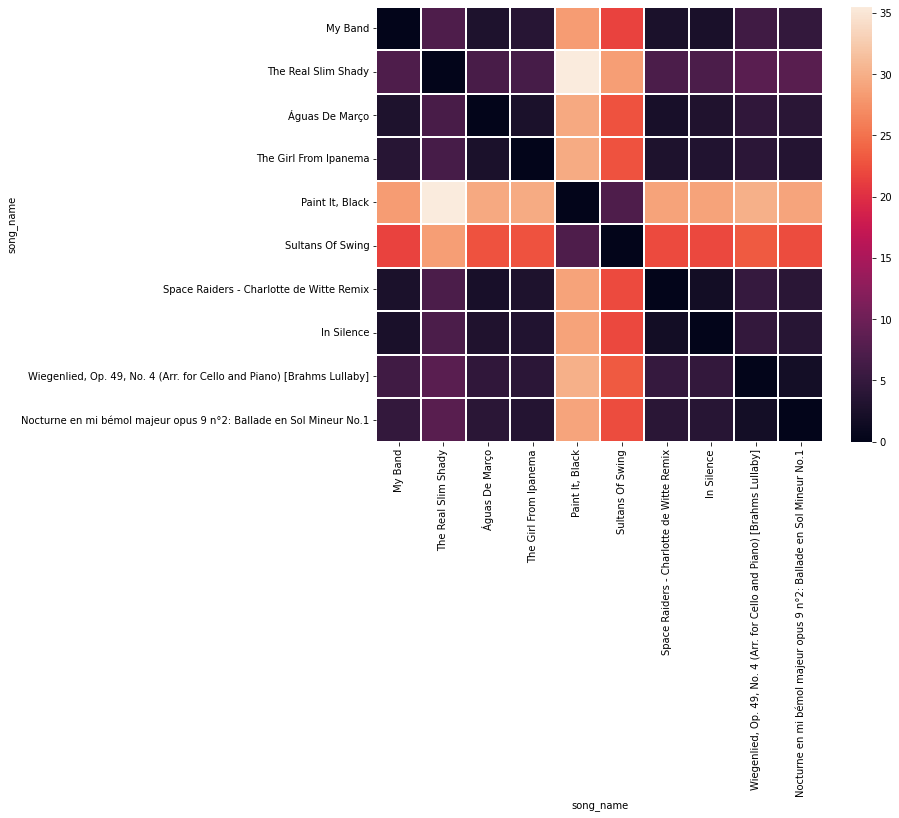

In [7]:
robust_df = RobustScaler().fit_transform(df)
robust = pd.DataFrame(robust_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
robust_distances = pd.DataFrame(pairwise_distances(robust), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(robust_distances, ax=ax1, linewidths=.2);

## Quantile transformer

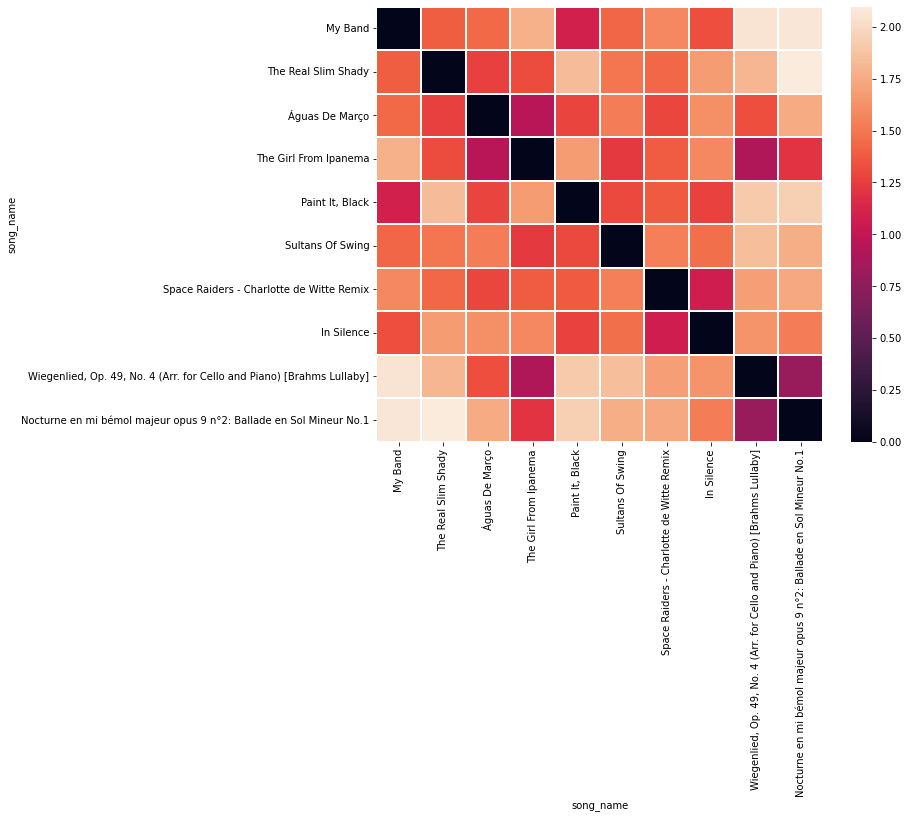

In [8]:
quantile_df = QuantileTransformer(n_quantiles=len(df)).fit_transform(df)
quantile = pd.DataFrame(quantile_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
quantile_distances = pd.DataFrame(pairwise_distances(quantile), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(quantile_distances, ax=ax1, linewidths=.2);

## Power transformer

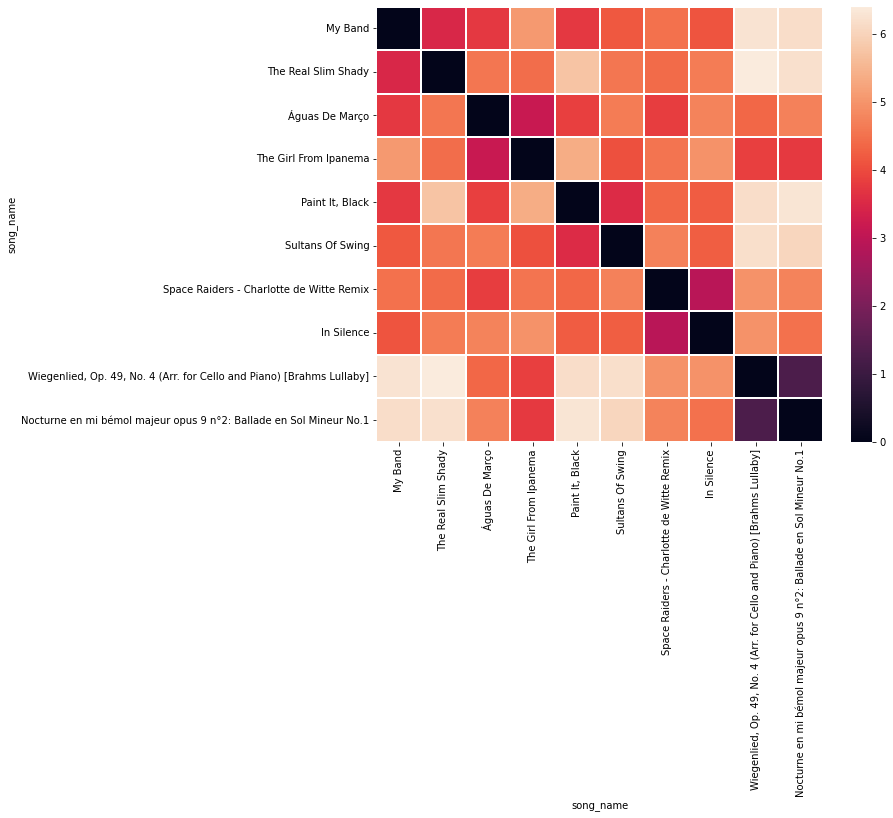

In [9]:
power_df = PowerTransformer().fit_transform(df)
power = pd.DataFrame(power_df, columns=df.columns, index=df.index)

# Making the DataFrame for the MinMaxed heatmap
power_distances = pd.DataFrame(pairwise_distances(power), index=df.index, columns=df.index)

# Stating that we want two plots
fig, (ax1) = plt.subplots(1, figsize=(10, 8))

# Plotting the two plots
sns.heatmap(power_distances, ax=ax1, linewidths=.2);

## All Heatmaps

In [10]:
#distance_df = pd.DataFrame(pairwise_distances(df), index=df.index, columns=df.index)

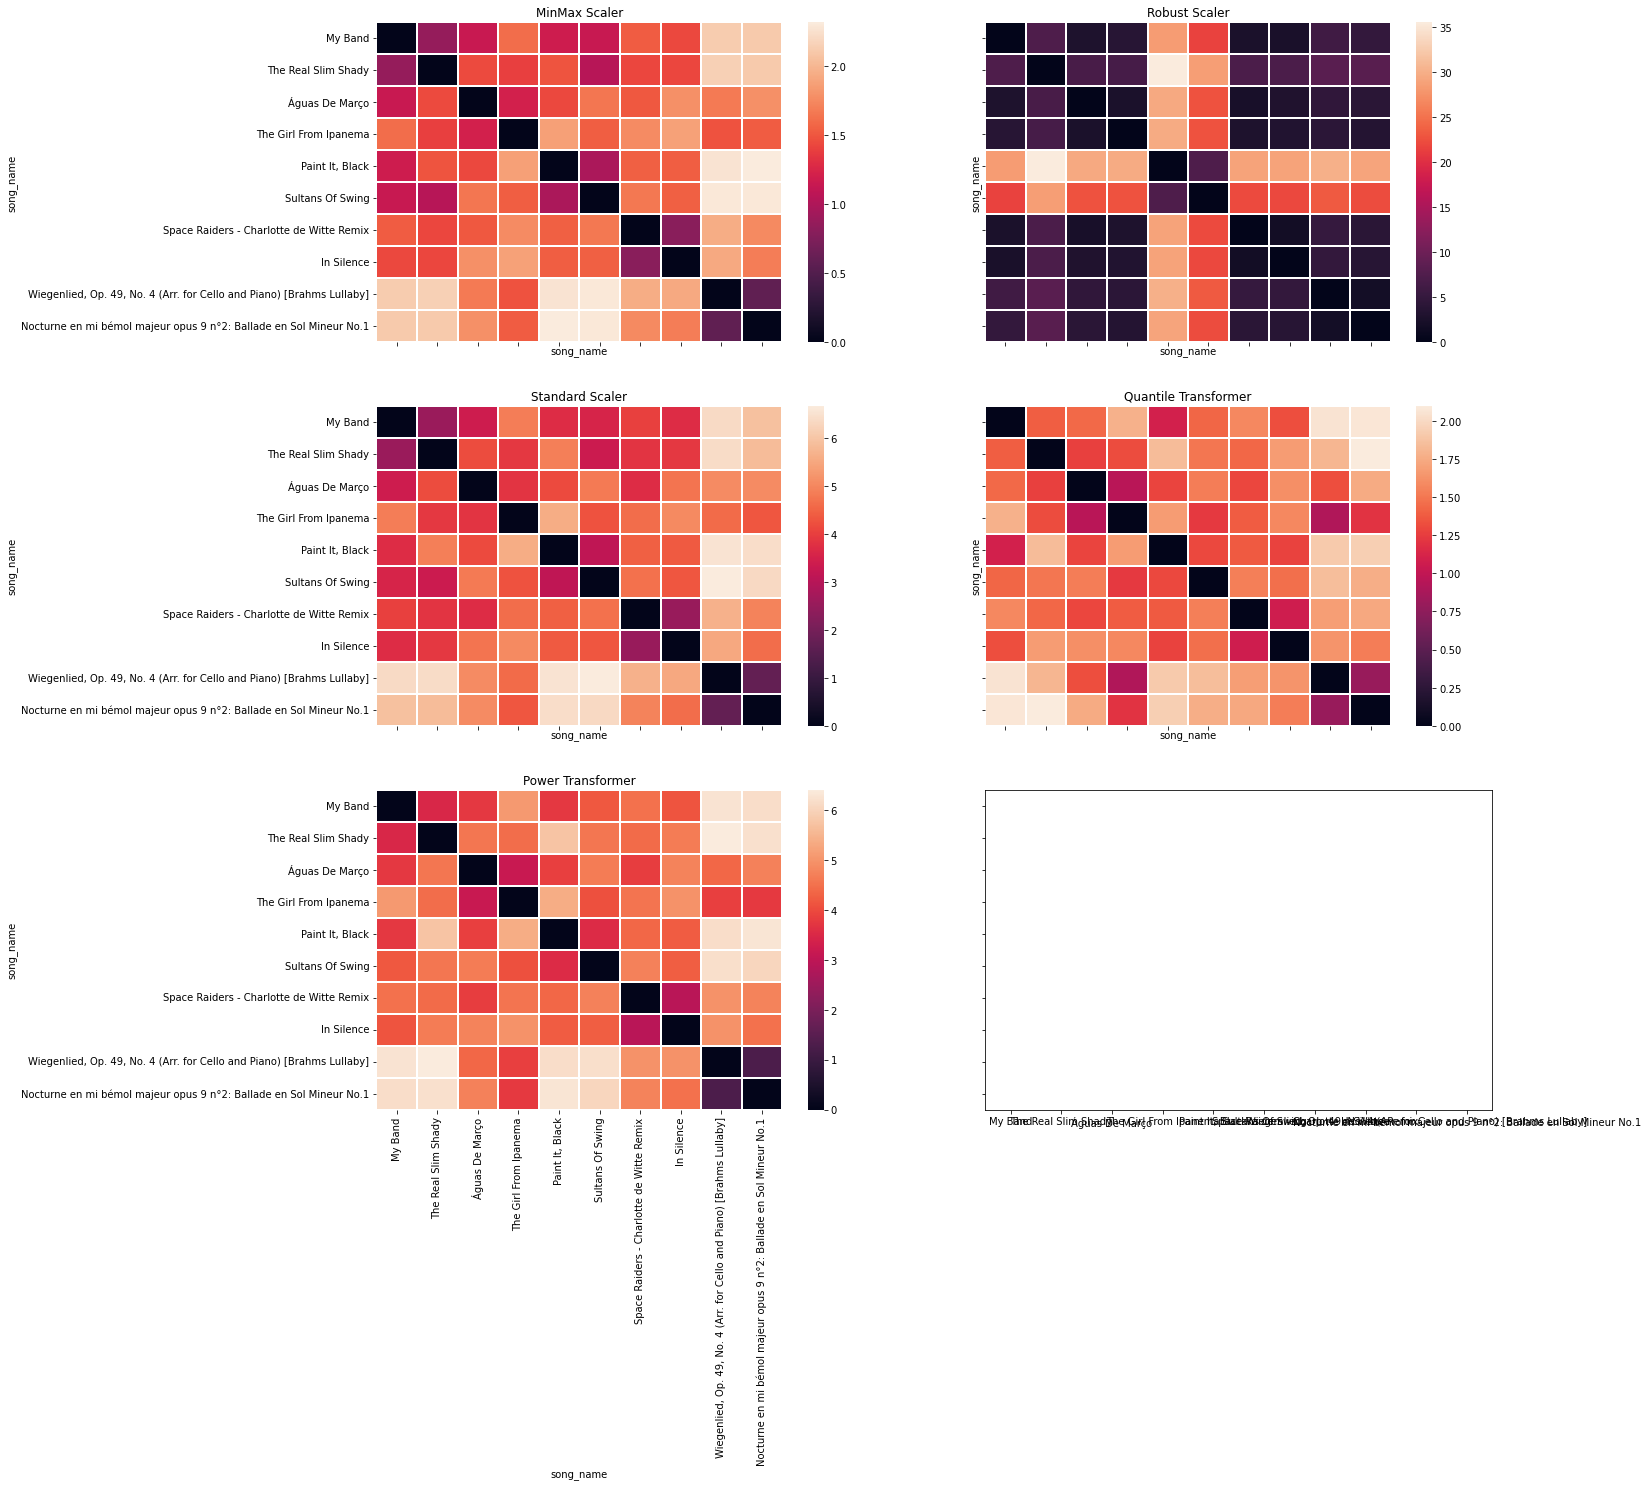

In [11]:
fig, ax = plt.subplots(3,2, figsize=(20, 20), sharex=True, sharey=True)

sns.heatmap(minmax_distances, ax=ax[0, 0], linewidths=.2);
sns.heatmap(robust_distances, ax=ax[0, 1], linewidths=.2);
sns.heatmap(standard_distances, ax=ax[1, 0], linewidths=.2);
sns.heatmap(quantile_distances, ax=ax[1, 1], linewidths=.2);
sns.heatmap(power_distances, ax=ax[2, 0], linewidths=.2);
#sns.heatmap(distance_df, ax=ax[2, 1], linewidths=.2);

ax[0, 0].set_title('MinMax Scaler')
ax[0, 1].set_title('Robust Scaler')
ax[1, 0].set_title('Standard Scaler')
ax[1, 1].set_title('Quantile Transformer')
ax[2, 0].set_title('Power Transformer')
#ax[2, 1].set_title('Eucleasian Distance')


plt.show()